In [4]:
pip install mne

  Using cached mne-1.9.0-py3-none-any.whl.metadata (20 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
  Using cached matplotlib-3.10.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached pooch-1.8.2-py3-none-any.whl.metadata (10 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached contourpy-1.3.2-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.57.0-cp313-cp313-macosx_10_13_universal2.whl.metadata (102 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pillow-11.2.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (8.9 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached mne-1.9.0-py3-none-any.whl (7.4 MB)
Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)
Using cached matplotlib-3.10.1-cp313-cp313-macosx_11_0_arm64.whl (8.0 MB)
Using cached pooch-1.8.2

In [7]:
pip install PyQt5


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 6.8 MB/s eta 0:00:006.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.1/37.1 MB 7.2 MB/s eta 0:00:00m eta 0:00:010:01:01

[notice] A new release of pip is available: 25.0 -> 25.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.4.1_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import mne #import biblioteki mne
import matplotlib.pyplot as plt
import numpy as np
%matplotlib qt

In [3]:
d_path = "eeg_files/20241017_kp.bdf" #ścieżka do pliku z danymi
ch_eog = ["EXG1","EXG2"] #zewnętrzne kanały mierzące ruchy gałek ocznych
ch_ecg = ["EXG3","EXG4"] #zewnętrzne kanały mierzące aktywność serca
ch_exclude = [f"EXG{i}" for i in range(5,9)]

In [4]:
raw = mne.io.read_raw_bdf(
    d_path, preload=True, eog=ch_eog, misc=ch_ecg, exclude=ch_exclude #wczytanie surowych danych
    )


Extracting EDF parameters from /Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg/eeg_files/20241017_kp.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2928639  =      0.000 ...  1430.000 secs...


In [5]:
raw.set_montage("biosemi64") # ustawienie montażu elektrod dla aparatury BioSemi
notch = 50
bandpass_low = 0.1
bandpass_high = 40
raw.notch_filter(notch)
raw.filter(bandpass_low,bandpass_high)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 13517 samples (6.600 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 67585 samples (33.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


<RawEDF | 20241017_kp.bdf, 69 x 2928640 (1430.0 s), ~1.51 GiB, data loaded>

In [6]:
eeg_ch_idx = mne.pick_types(raw.info,eeg=True,exclude=['Fp1', 'Fp2', 'Fpz',  
    'AF3', 'AF4', 'AF7', 'AF8', 'AFz', 
    'F3', 'F4', 'F7', 'F8', 'Fz',  
    'F1', 'F2', 'F5', 'F6'])

all_ch_names = raw.info["ch_names"]
eeg_ch_names = [all_ch_names[i] for i in eeg_ch_idx]

eeg_data =raw.get_data(picks=eeg_ch_idx,units="uV")
eeg_std = np.std(eeg_data,axis=1)
std = np.std(eeg_std)
treshold = 3 * std
bad_idx = np.where(eeg_std > treshold)[0]
bad_chs = [eeg_ch_names[i] for i in bad_idx]

In [7]:
bad_chs.append("CP1") #do listy bad_chs dodano kanał CP1 
raw.info["bads"].extend(bad_chs)

In [8]:
from mne.preprocessing import ICA, create_eog_epochs, create_ecg_epochs

In [22]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 6.7 MB/s eta 0:00:006.9 MB/s eta 0:00:01

[notice] A new release of pip is available: 25.0 -> 25.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.4.1_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
filt_raw = raw.copy().filter(l_freq=1.0, h_freq=100)
filt_raw.set_eeg_reference("average")

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6759 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<RawEDF | 20241017_kp.bdf, 69 x 2928640 (1430.0 s), ~1.51 GiB, data loaded>

In [10]:
ica = mne.preprocessing.ICA(n_components = 20, max_iter="auto",method="infomax",random_state=97)
ica.fit(filt_raw) 

Fitting ICA to data using 60 channels (please be patient, this may take a while)
Selecting by number: 20 components
Computing Infomax ICA
Fitting ICA took 203.8s.


Method,infomax
Fit parameters,extended=Falsemax_iter=500
Fit,500 iterations on raw data (2928640 samples)
ICA components,20
Available PCA components,60
Channel types,eeg
ICA components marked for exclusion,—


In [11]:
explained_var_ratio = ica.get_explained_variance_ratio(filt_raw)
for ratio in explained_var_ratio.items():
    print(f"Fraction of eeg variance explained by all components: {ratio}")

Fraction of eeg variance explained by all components: ('eeg', np.float64(0.9642947441398267))


In [12]:
eog_indices, eog_scores = ica.find_bads_eog(raw)

Using EOG channels: EXG1, EXG2
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 20480 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 20480 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 20480 s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


In [13]:
ica.plot_properties(raw, picks=eog_indices)

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
715 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
715 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
715 matching events found
No baseline correction applied
0 projection items activated


[<Figure size 1400x1200 with 6 Axes>,
 <Figure size 1400x1200 with 6 Axes>,
 <Figure size 1400x1200 with 6 Axes>]

2025-05-03 16:10:59.159 Python[46751:7126447] +[IMKClient subclass]: chose IMKClient_Modern
2025-05-03 16:10:59.159 Python[46751:7126447] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [14]:
from mne_icalabel import label_components

In [15]:
import onnxruntime

In [16]:
ic_labels = label_components(filt_raw, ica, method='iclabel')
print(ic_labels["labels"])

/var/folders/vc/x50hw5690nj406s2rv6052180000gn/T/ipykernel_46751/3132314654.py:1: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  ic_labels = label_components(filt_raw, ica, method='iclabel')
/var/folders/vc/x50hw5690nj406s2rv6052180000gn/T/ipykernel_46751/3132314654.py:1: RuntimeWarning: The provided ICA instance was fitted with a 'infomax' algorithm. ICLabel was designed with extended infomax ICA decompositions. To use the extended infomax algorithm, use the 'mne.preprocessing.ICA' instance with the arguments 'ICA(method='infomax', fit_params=dict(extended=True))' (scikit-learn) or 'ICA(method='picard', fit_params=dict(ortho=False, extended=True))' (python-picard).
  ic_labels = label_components(filt_raw, ica, method='iclabel')


['eye blink', 'eye blink', 'channel noise', 'brain', 'other', 'other', 'brain', 'other', 'brain', 'brain', 'other', 'other', 'other', 'other', 'brain', 'other', 'brain', 'muscle artifact', 'muscle artifact', 'other']


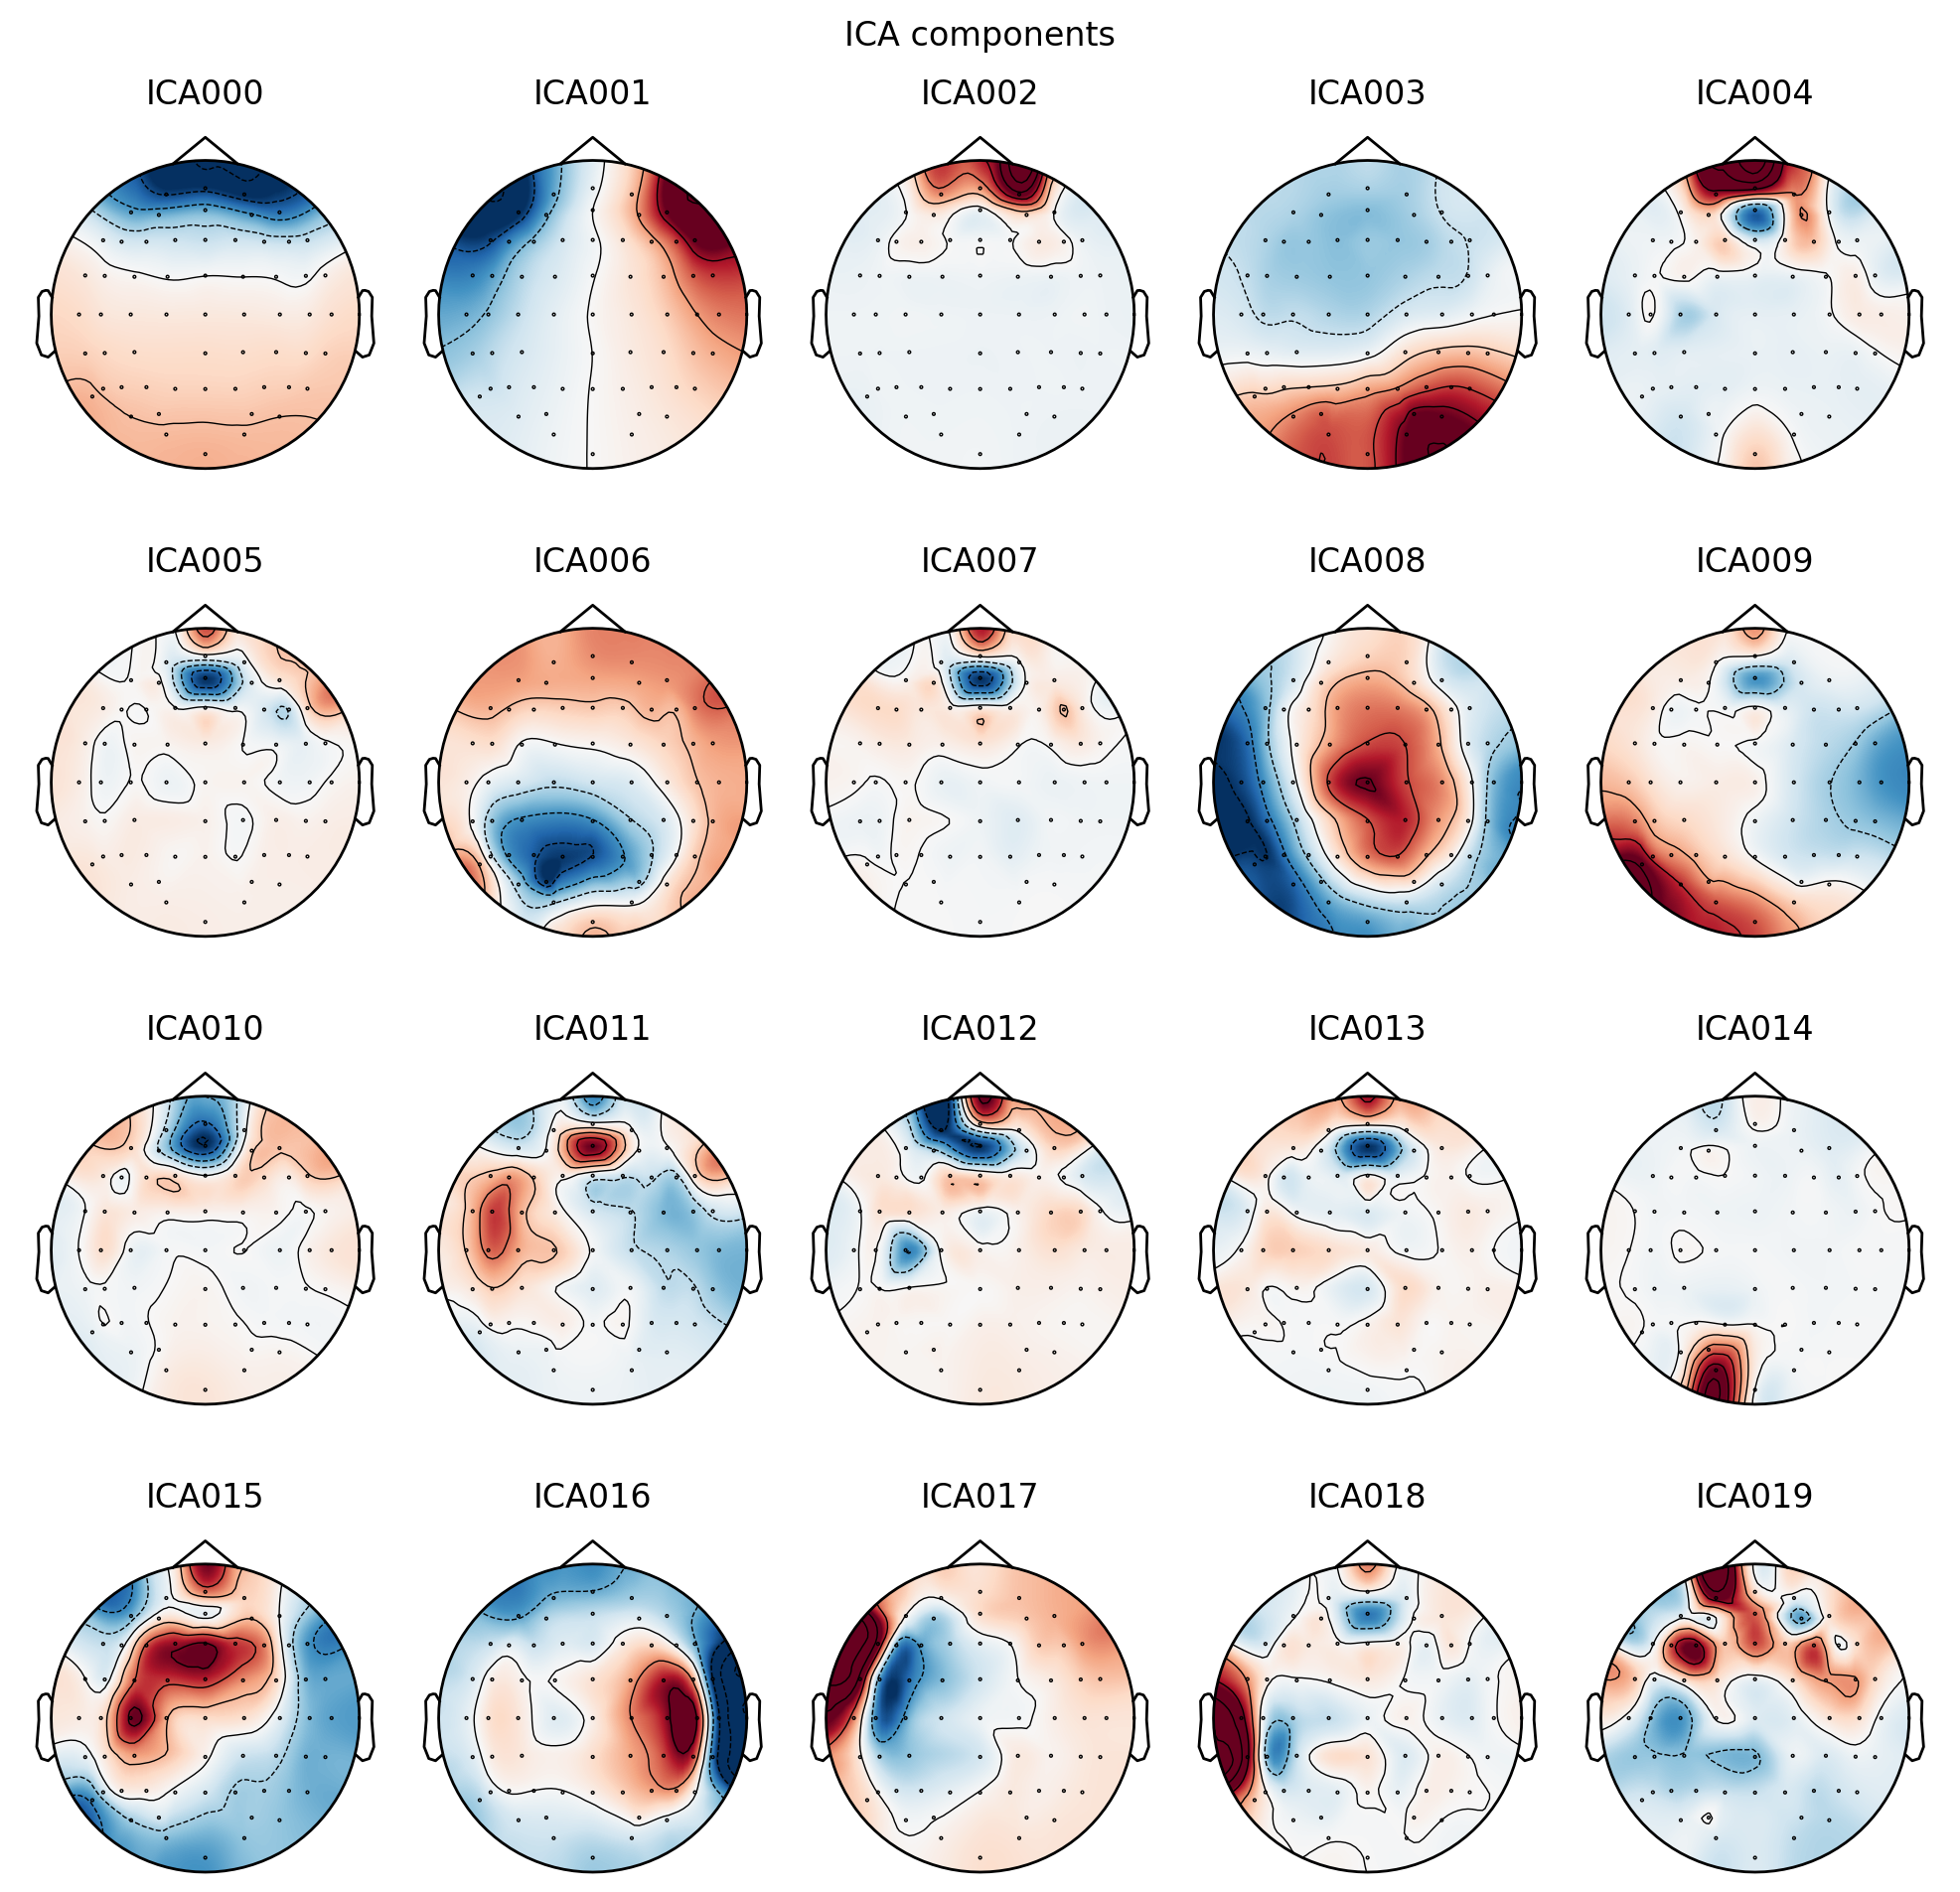

In [17]:
ica.plot_components()

In [23]:
labels = ic_labels["labels"]
artif = [idx for idx, label in enumerate(labels) if label not in ["brain","other"]]
print(artif)

[0, 1, 3, 22, 24, 27, 28, 31, 32, 35, 39, 42, 45, 47, 50]


In [24]:
ica.plot_properties(raw, picks=artif, verbose=False)

[<Figure size 1400x1200 with 6 Axes>,
 <Figure size 1400x1200 with 6 Axes>,
 <Figure size 1400x1200 with 6 Axes>,
 <Figure size 1400x1200 with 6 Axes>,
 <Figure size 1400x1200 with 6 Axes>,
 <Figure size 1400x1200 with 6 Axes>,
 <Figure size 1400x1200 with 6 Axes>,
 <Figure size 1400x1200 with 6 Axes>,
 <Figure size 1400x1200 with 6 Axes>,
 <Figure size 1400x1200 with 6 Axes>,
 <Figure size 1400x1200 with 6 Axes>,
 <Figure size 1400x1200 with 6 Axes>,
 <Figure size 1400x1200 with 6 Axes>,
 <Figure size 1400x1200 with 6 Axes>,
 <Figure size 1400x1200 with 6 Axes>]

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 16 ICA components
    Projecting back using 60 PCA components


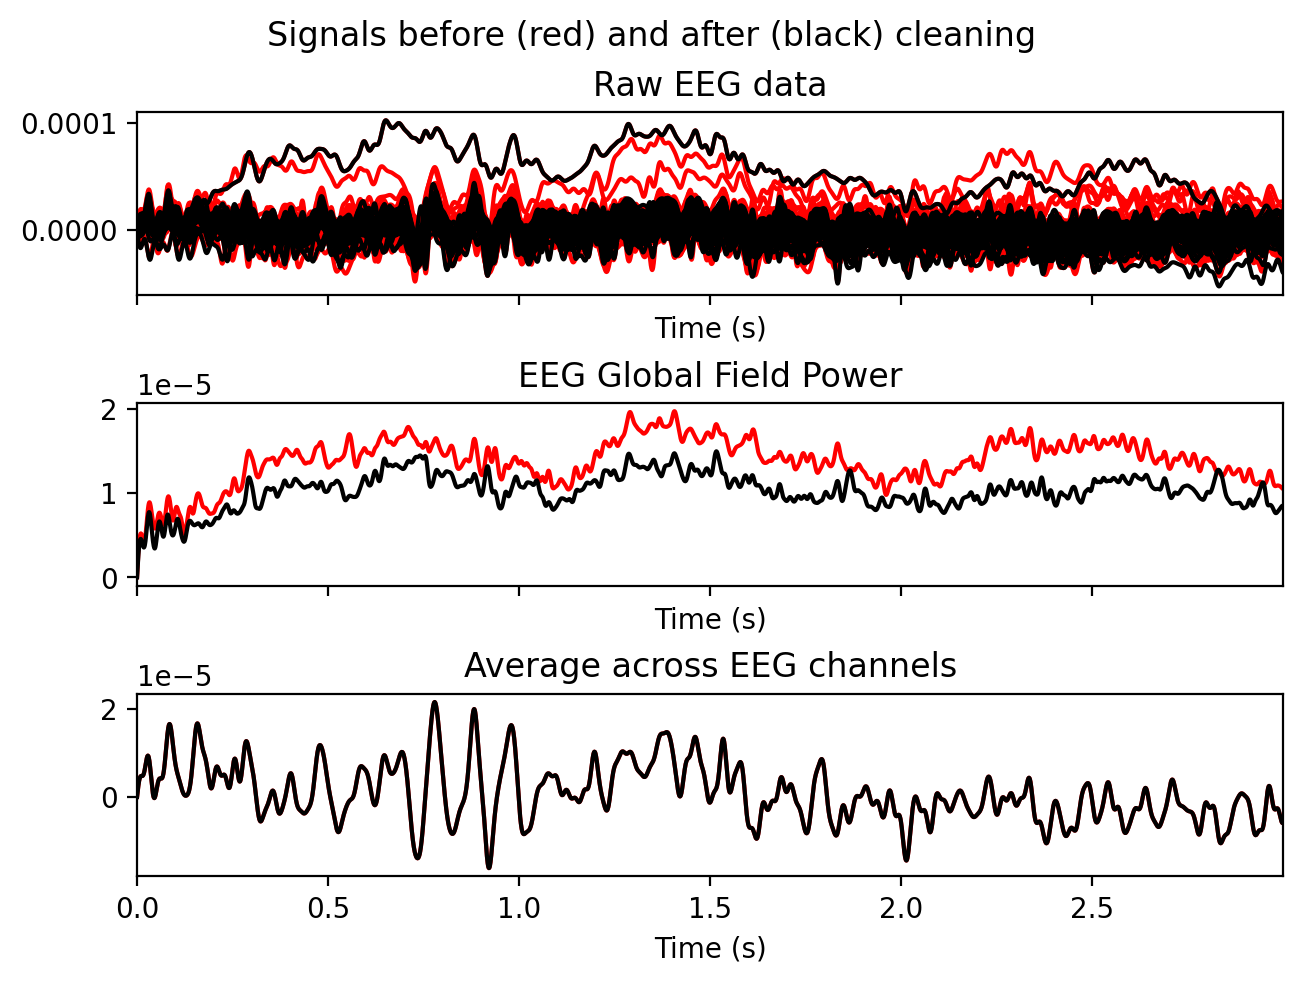

In [23]:
ica.plot_overlay(raw, exclude=[1,2,6,16,17,18,0,13,7,5,10,4,3,11,12,14], picks="eeg")

In [1]:
ica.plot_properites(raw,picks=[0])

NameError: name 'ica' is not defined

In [1]:
ica.plot_properties(raw,picks=[17])

NameError: name 'ica' is not defined